In [203]:
import re
import string

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline
import matplotlib.pyplot as plt
from nltk import bigrams
from nltk import trigrams
import spacy
from itertools import tee, islice, chain

In [118]:
def generate_word_cloud(dic):
    wc = WordCloud(
            background_color='white',
            width=800,
            height=400,
            max_words=200)\
        .generate_from_frequencies(dic)

    plt.figure(figsize=(25, 25))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [5]:
nlp = spacy.load('es_core_news_sm')

In [20]:
institutions = pd.read_excel('data/ELA - Instituciones.xlsx')

In [21]:
institutions = institutions[institutions["categoria"] == "Fuerzas Armadas"]

In [22]:
institutions['fundamento'] = institutions['fundamento'].str.lower()
institutions['fundamento'] = institutions['fundamento'].apply(lambda x: re.sub("[0-9]", '', x))
institutions['fundamento'] = institutions['fundamento'].str.translate(str.maketrans(' ', ' ', string.punctuation))
institutions['fundamento'] = institutions['fundamento'].str.strip()
institutions['fundamento'] = institutions['fundamento'].str.replace('\n',' ')

institutions = institutions[[len(x.split( )) > 2  for x in institutions.fundamento]]
institutions = institutions.reset_index(drop=True)

In [23]:
institutions.head()

,categoria,fundamento
0,Fuerzas Armadas,para mantener orden seguridad y respeto
1,Fuerzas Armadas,que estén sometidas a la justicia civil que se...
2,Fuerzas Armadas,fundamentales para el resguardo de la soberaní...
3,Fuerzas Armadas,creemos que son necesarias para la defensa de ...
4,Fuerzas Armadas,redefinir el rol de las fuerzas armadas como u...


# WordCloud raw

In [ ]:
words = []
for x in word_tokenize(' '.join(institutions['fundamento'].to_list())):
    if x not in stopwords.words('spanish'):
        words.append(x)
#words

In [31]:
word_count_map = {}
for i in words:
    word_count_map[i] = words.count(i)
#word_count_map

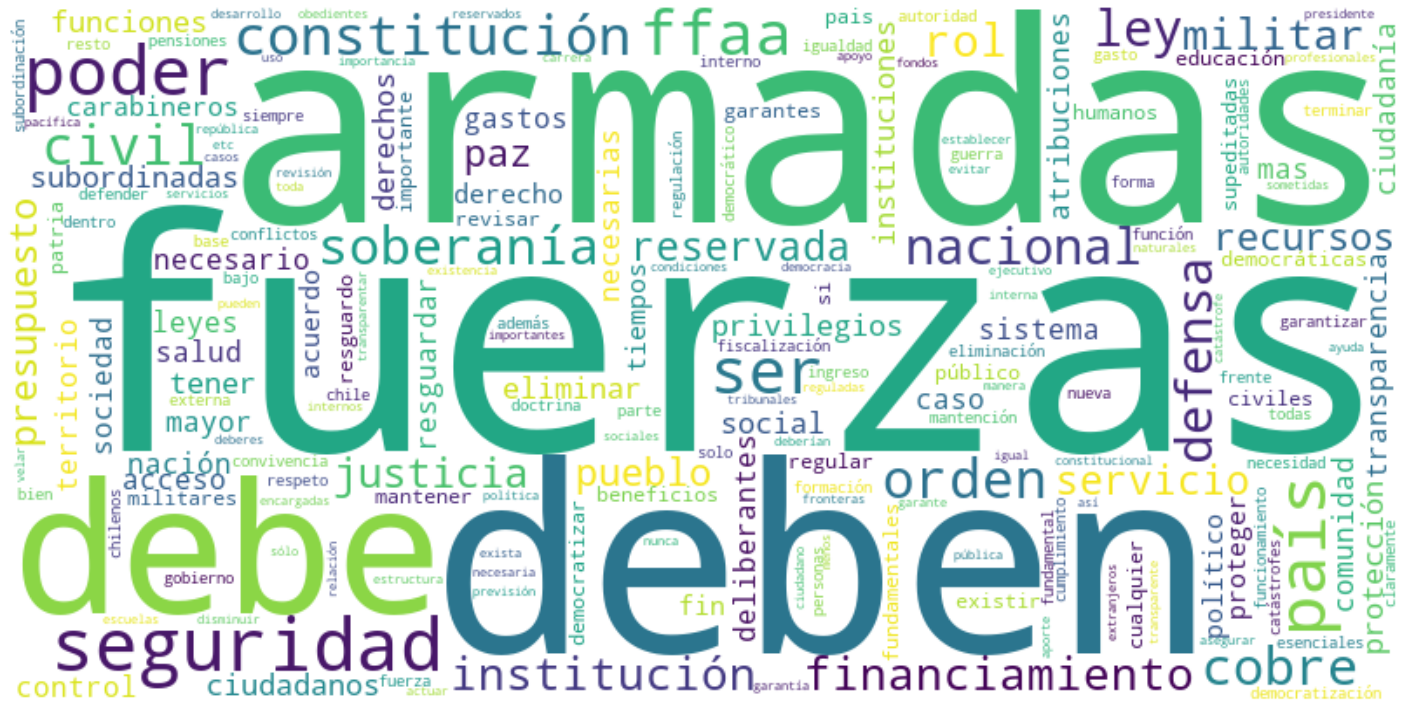

In [119]:
generate_word_cloud(word_count_map)

# WordCloud bigram raw

In [199]:
l_bigram = []
for chunk in institutions['fundamento']:
    for x in bigrams(word_tokenize(chunk)):
        l_bigram.append(x)
#l

In [178]:
word_count_bigram_map = {}
for i, j in l_bigram:
    if not (i in stopwords.words('spanish') or j in stopwords.words('spanish')):
        word_count_bigram_map[i + " " +j] = l_bigram.count((i, j))
#word_count_bigram_map

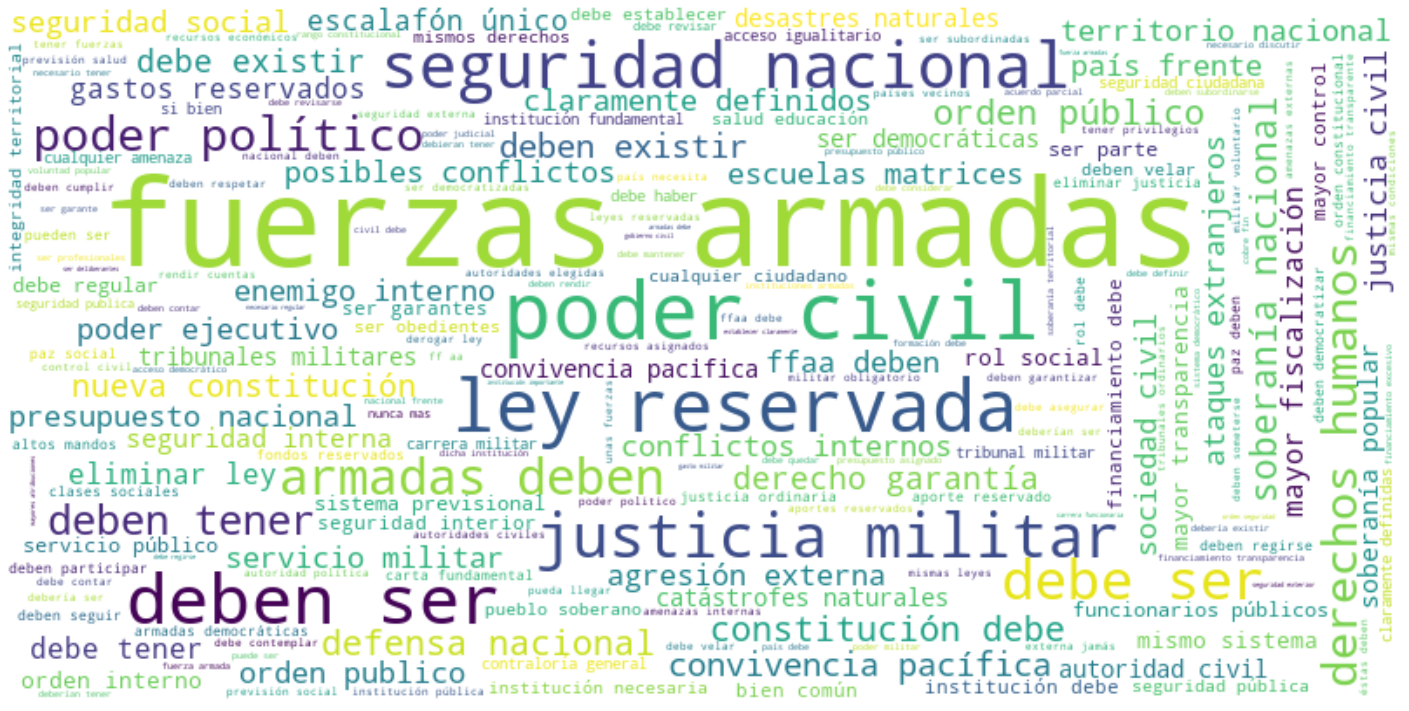

In [179]:
generate_word_cloud(word_count_bigram_map)

# WordCloud trigram raw

In [181]:
l_trigram = []
for chunk in institutions['fundamento']:
    a = nlp(chunk)
    for x in trigrams(a):
        l_trigram.append(x)
#l_trigram

In [183]:
word_count_trigram_map = {}
for i, j, k in l_trigram:
    if not (i.text in stopwords.words('spanish') and j.text in stopwords.words('spanish') and k.text in stopwords.words('spanish')) and \
        not (i.text in stopwords.words('spanish') and k.text in stopwords.words('spanish')) and \
        not (j.text in stopwords.words('spanish') and k.text in stopwords.words('spanish')) and \
        not (i.pos_ == "ADP" and j.pos_ == "ADP") and \
        not (j.pos_ == "ADP" and k.pos_ == "ADP") and \
        not (i.pos_ == "ADP" and j.pos_ == "DET") and \
        not (j.pos_ == "ADP" and k.pos_ == "DET") and \
        not (i.pos_ == "ADJ" and j.pos_ == "ADP") and \
        not (j.pos_ == "ADJ" and k.pos_ == "ADP") :

        word_count_trigram_map[i.text + " " + j.text + " " + k.text] = l_trigram.count((i, j, k))

#word_count_trigram_map

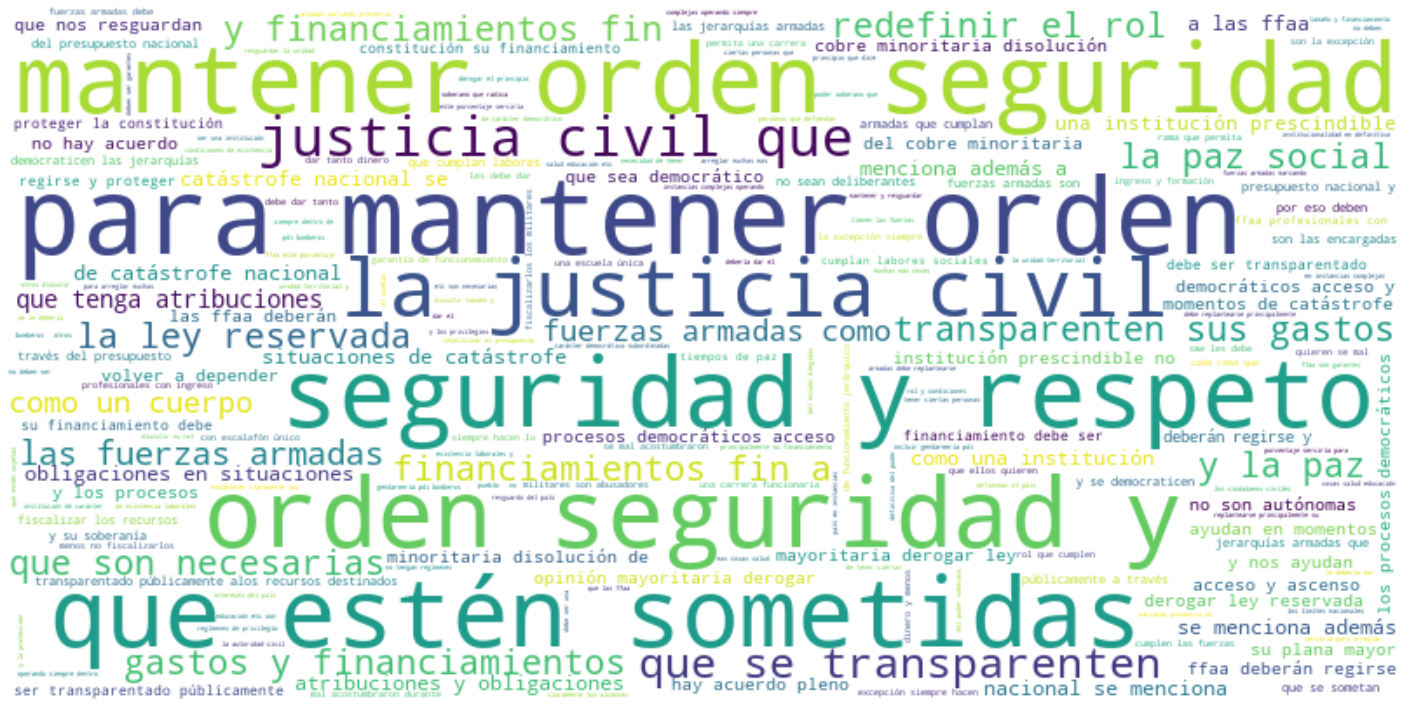

In [184]:
generate_word_cloud(word_count_trigram_map)

# WordCloud token/noun

In [ ]:
words = []
for x in institutions['fundamento']:
    for i in nlp(x):
        if (i.text not in stopwords.words('spanish')) and (i.pos_ == 'NOUN'):
            words.append(i.lemma_)
#words

In [ ]:
word_count_map_noun = {}
for i in words:
    word_count_map_noun[i] = words.count(i)
#word_count_map

In [ ]:
generate_word_cloud(word_count_map)